In [1]:
using Gmsh: gmsh
using GridapGmsh
using Gridap
using Gridap.Geometry
using Gridap.TensorValues
using Plots

In [2]:
const T0 = 0
const TAppMax = T0+10.0
const delt = 0.1
const tMax = 10.1
const uMax = 0.0192e-3
AppVel = uMax/tMax
uMin = 0
uTran = uMax

1.92e-5

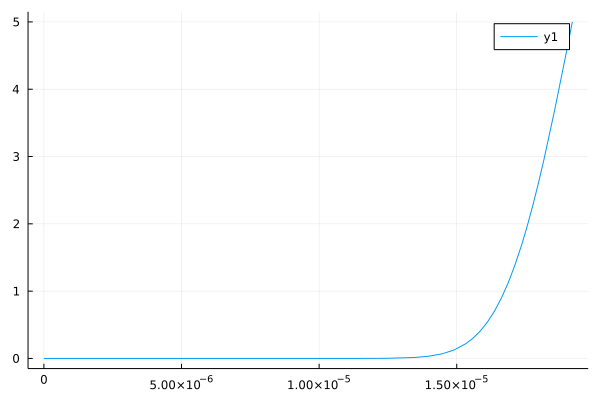

In [3]:
using SymPy

x,x₁ = symbols("x,x₁", real = true)

heaviside(x) = 0.5 * (sign(x) + 1)
interval(x, a, b) = heaviside(x-a) - heaviside(x-b)

hS = uMax/10
F(x) = (T0 - TAppMax) * interval(x,-4*hS+uMin,uTran)
wₕ(x,x₁) = (1/(sqrt(2*pi)*hS))*exp(-(x-x₁)^2/(2*hS^2))
smoothT = SymPy.integrate(F(x₁)*wₕ(x,x₁),(x₁,-4*hS,uMax)) +  TAppMax
plot(smoothT,0,uMax)

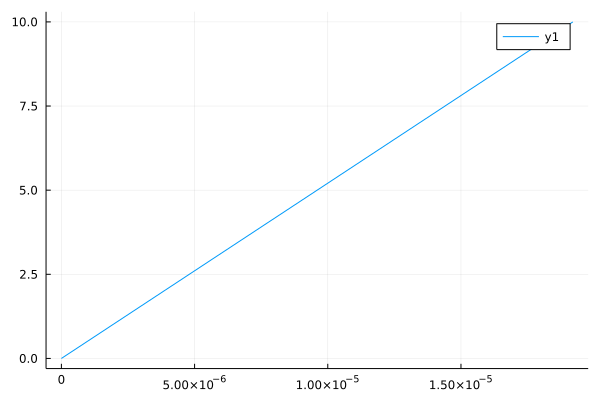

In [4]:
function Tfun(u)  
    if u <= uTran
      return ((TAppMax - T0)/uTran)*u + T0
    else
     return  TAppMax
    end
end 
plot(Tfun,0,uMax)

In [5]:
uAppVec = range(0,uMax,length = Int64(floor(tMax/delt)))

AppTOption = 2 ## 1 for smooth and otherwise linear than constant

if AppTOption == 1
    TAppVec = smoothT.(uAppVec)
  else
    TAppVec = Tfun.(uAppVec) 
end 

100-element Vector{Float64}:
  0.0
  0.10101010101010102
  0.20202020202020204
  0.30303030303030304
  0.4040404040404041
  0.5050505050505051
  0.6060606060606061
  0.7070707070707071
  0.8080808080808082
  0.9090909090909092
  1.0101010101010102
  1.1111111111111112
  1.2121212121212122
  ⋮
  8.88888888888889
  8.98989898989899
  9.090909090909092
  9.191919191919192
  9.292929292929292
  9.393939393939394
  9.494949494949495
  9.595959595959597
  9.696969696969697
  9.797979797979798
  9.8989898989899
 10.0

In [6]:
I2 = SymTensorValue{2,Float64}(1.0,0.0,1.0)
I4 = I2⊗I2
I4_sym = one(SymFourthOrderTensorValue{2,Float64})
I4_vol = (1.0/2)*I4
I4_dev = I4_sym - I4_vol

SymFourthOrderTensorValue{2, Float64, 9}(0.5, 0.0, -0.5, 0.0, 0.5, 0.0, -0.5, 0.0, 0.5)

In [7]:
const L = 0.05
const lsp = L/100
const eps = L/100
const Lc = 0.2*L 
const beta = 3*π/4
const Lcx = -Lc*cos(beta)
const Lcy = Lc*sin(beta)
const hfc = lsp/4
const hf = lsp/4
const h = L/8
gmsh.initialize()
gmsh.option.setNumber("General.Terminal", 1)
gmsh.model.geo.addPoint(0.0, 0.0, 0.0, h, 1)  
gmsh.model.geo.addPoint(L, 0.0, 0.0, h, 2) 
gmsh.model.geo.addPoint(L, L-eps, 0.0,h, 3) 
gmsh.model.geo.addPoint(L-Lcx, L-eps+Lcy, 0.0, hfc, 4)
gmsh.model.geo.addPoint(L-Lcx+eps, L+Lcy,0.0, hfc, 5)
gmsh.model.geo.addPoint(L+eps, L, 0.0,h, 6)
gmsh.model.geo.addPoint(2*L, L,0.0, h, 7)
gmsh.model.geo.addPoint(2*L, 2*L, 0.0, h, 8)
gmsh.model.geo.addPoint(L, 2*L, 0.0, h, 9)
gmsh.model.geo.addPoint(L, 3*L, 0.0, h, 10)
gmsh.model.geo.addPoint(0, 3*L, 0.0, h, 11)
gmsh.model.geo.addPoint(0, 2*L, 0.0, hf, 12)
gmsh.model.geo.addPoint(-L, 2*L, 0.0, h, 13)
gmsh.model.geo.addPoint(-L, L, 0.0, h, 14)
gmsh.model.geo.addPoint(0, L, 0.0, h, 15)
gmsh.model.geo.addPoint(L-Lcx-eps/2, 1.8*L, 0.0, h, 16)

gmsh.model.geo.addLine(1, 2, 1)
gmsh.model.geo.addLine(2, 3, 2)
gmsh.model.geo.addLine(3, 4, 3)
gmsh.model.geo.addLine(4, 5, 4)
gmsh.model.geo.addLine(5, 6, 5)
gmsh.model.geo.addLine(6, 7, 6)
gmsh.model.geo.addLine(7, 8, 7)
gmsh.model.geo.addLine(8, 9, 8)
gmsh.model.geo.addLine(9, 10, 9)
gmsh.model.geo.addLine(10, 11, 10)
gmsh.model.geo.addLine(11, 12, 11)
gmsh.model.geo.addLine(12, 13, 12)
gmsh.model.geo.addLine(13, 14, 13)
gmsh.model.geo.addLine(14, 15, 14)
gmsh.model.geo.addLine(15, 1, 15)
gmsh.model.geo.addLine(4, 16, 151)

gmsh.model.geo.addCurveLoop([12,13,14,15,1,2,3,4,5,6,7,8,9,10,11],1) 
gmsh.model.geo.addPlaneSurface([1], 1)
gmsh.model.addPhysicalGroup(2, [1],1)
gmsh.model.addPhysicalGroup(1, [1],1)
gmsh.model.addPhysicalGroup(1, [10],2)
gmsh.model.addPhysicalGroup(1, [13],3)
gmsh.model.addPhysicalGroup(1, [7],4)
gmsh.model.setPhysicalName(2, 1, "Domain")
gmsh.model.setPhysicalName(1, 1, "BottomEdge")
gmsh.model.setPhysicalName(1, 2, "TopEdge")
gmsh.model.setPhysicalName(1, 3, "LeftEdge")
gmsh.model.setPhysicalName(1, 4, "RightEdge")

gmsh.model.mesh.field.add("Distance", 1)
gmsh.model.mesh.field.setNumbers(1, "EdgesList", [151])

gmsh.model.mesh.field.add("Threshold", 2)
gmsh.model.mesh.field.setNumber(2, "IField", 1)
gmsh.model.mesh.field.setNumber(2, "LcMin", hf)
gmsh.model.mesh.field.setNumber(2, "LcMax", h)
gmsh.model.mesh.field.setNumber(2, "DistMin", 1.0*Lcy)
gmsh.model.mesh.field.setNumber(2, "DistMax", 1.0*Lc)

gmsh.model.mesh.field.setAsBackgroundMesh(2)

gmsh.model.geo.synchronize()
gmsh.model.mesh.generate(2)
gmsh.write("CrushiformShapeWithInclinedCrack(thermal).msh")
gmsh.finalize()

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 10%] Meshing curve 2 (Line)
Info    : [ 20%] Meshing curve 3 (Line)
Info    : [ 20%] Meshing curve 4 (Line)
Info    : [ 30%] Meshing curve 5 (Line)
Info    : [ 40%] Meshing curve 6 (Line)
Info    : [ 40%] Meshing curve 7 (Line)
Info    : [ 50%] Meshing curve 8 (Line)
Info    : [ 50%] Meshing curve 9 (Line)
Info    : [ 60%] Meshing curve 10 (Line)
Info    : [ 70%] Meshing curve 11 (Line)
Info    : [ 70%] Meshing curve 12 (Line)
Info    : [ 80%] Meshing curve 13 (Line)
Info    : [ 90%] Meshing curve 14 (Line)
Info    : [ 90%] Meshing curve 15 (Line)
Info    : [100%] Meshing curve 151 (Line)
Info    : Done meshing 1D (Wall 0.0170431s, CPU 0.015625s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 2.01937s, CPU 2.01562s)
Info    : 41694 nodes 83134 elements
Info    : Writing 'CrushiformShapeWithInclinedCrack(thermal).msh'...
Info    : Done writing 'Crush

In [8]:
model = GmshDiscreteModel("CrushiformShapeWithInclinedCrack(thermal).msh")
writevtk(model,"CrushiformShapeWithInclinedCrack(thermal)")

Info    : Reading 'CrushiformShapeWithInclinedCrack(thermal).msh'...
Info    : 33 entities
Info    : 41426 nodes
Info    : 82630 elements
Info    : Done reading 'CrushiformShapeWithInclinedCrack(thermal).msh'


3-element Vector{Vector{String}}:
 ["CrushiformShapeWithInclinedCrack(thermal)_0.vtu"]
 ["CrushiformShapeWithInclinedCrack(thermal)_1.vtu"]
 ["CrushiformShapeWithInclinedCrack(thermal)_2.vtu"]

In [9]:
using Gridap.Geometry
labels = get_face_labeling(model)
dimension = 2
mat_tags = get_face_tag(labels,dimension)

82598-element Vector{Int8}:
 5
 5
 5
 5
 5
 5
 5
 5
 5
 5
 5
 5
 5
 ⋮
 5
 5
 5
 5
 5
 5
 5
 5
 5
 5
 5
 5

In [10]:
const Mat_tag = get_tag_from_name(labels,"Domain")

5

In [11]:
const E_mat = 218.4e3
const ν_mat = 0.2

0.2

#### Input fracture parameters

In [12]:
const Gc = 2.0e-4
const η = 1e-15

1.0e-15

#### Input Thermal parameter 

In [13]:
const α = 6.0e-4
const c = 1.0
const κ_mat = 1.0
const ρ = 0.0

0.0

## Constitutive Matrices

### Elastic stiffness tensor

In [14]:
function ElasFourthOrderConstTensor(E ,ν , PlanarState)
# 1 for Plane Stress and 2 Plane Strain Condition
if PlanarState == 1
C1111 = E /(1 -ν *ν )
C1122 = (ν *E ) /(1 -ν *ν )
C1112 = 0.0
C2222 = E /(1 -ν *ν )
C2212 = 0.0
C1212 = E /(2*(1+ν ) )
elseif PlanarState == 2
C1111 = (E *(1 -ν *ν ) ) /((1+ν ) *(1 -ν -2*ν *ν ) )
C1122 = (ν *E ) /(1 -ν -2*ν *ν )
C1112 = 0.0
C2222 = (E *(1 -ν ) ) /(1 -ν -2*ν *ν )
C2212 = 0.0
C1212 = E /(2*(1+ν ) )
end
C_ten = SymFourthOrderTensorValue(C1111 , C1112 , C1122 , C1112 ,
C1212 , C2212 , C1122 , C2212 , C2222)
return C_ten
end

ElasFourthOrderConstTensor (generic function with 1 method)

In [15]:
const C_mat = ElasFourthOrderConstTensor(E_mat,ν_mat,1)

SymFourthOrderTensorValue{2, Float64, 9}(227500.0, 0.0, 45500.0, 0.0, 91000.0, 0.0, 45500.0, 0.0, 227500.0)

## Computation of temperature field

In [16]:
κGradTemp(∇,s_in) = (s_in^2 + η)*κ_mat*∇

κGradTemp (generic function with 1 method)

In [17]:
σ_elas(εElas) = C_mat ⊙ εElas

σ_elas (generic function with 1 method)

In [18]:
function σ_elasMod(ε, ε_in, s_in,T,T_in)
    
   εElas_in = ε_in - α*(T_in-T0)*I2
   εElas = ε - α*(T-T0)*I2
    
 if tr(εElas_in)  >= 0
      σ = (s_in^2 + η)*σ_elas(εElas)
  elseif tr(εElas_in) < 0
      σ = (s_in^2 + η) *I4_dev ⊙ σ_elas(εElas) + I4_vol⊙ σ_elas(εElas) 
  end  
    return σ
end

σ_elasMod (generic function with 1 method)

In [19]:
function σ_totMod(ε, ε_in,s_in,T_in)
    
   εElas_in = ε_in - α*(T_in-T0)*I2
   εElasTot = ε
    
 if tr(εElas_in)  >= 0
      σT = (s_in^2 + η)*σ_elas(εElasTot)
  elseif tr(εElas_in) < 0
      σT = (s_in^2 + η) *I4_dev ⊙ σ_elas(εElasTot) + I4_vol⊙ σ_elas(εElasTot) 
  end  
    return σT
end

σ_totMod (generic function with 1 method)

In [20]:
function σ_totthMod(ε_in,s_in,T,T_in)
    
   εElas_in = ε_in - α*(T_in-T0)*I2
   εElasTot =  -α*T*I2
    
 if tr(εElas_in)  >= 0
      σT = (s_in^2 + η)*σ_elas(εElasTot)
  elseif tr(εElas_in) < 0
      σT = (s_in^2 + η) *I4_dev ⊙ σ_elas(εElasTot) + I4_vol⊙ σ_elas(εElasTot) 
  end  
    return σT
end

σ_totthMod (generic function with 1 method)

In [21]:
function σ_thermMod(ε_in,s_in,T_in)
    
   εElas_in = ε_in - α*(T_in-T0)*I2
   εElasTher = α*(T0)*I2
    
 if tr(εElas_in)  >= 0
      σF = (s_in^2 + η)*σ_elas(εElasTher)
  elseif tr(εElas_in) < 0
      σF = (s_in^2 + η)*I4_dev ⊙ σ_elas(εElasTher) + I4_vol⊙ σ_elas(εElasTher) 
  end  
    return σF
end

σ_thermMod (generic function with 1 method)

In [22]:
function ψPos(ε_in,T_in)
    εElas_in = ε_in - α*(T_in-T0)*I2
 if tr(εElas_in)  >= 0
      ψPlus = 0.5*((εElas_in) ⊙ σ_elas(εElas_in))             
  elseif tr(εElas_in)  < 0
      ψPlus = 0.5*((I4_dev ⊙ σ_elas(εElas_in)) ⊙ (I4_dev ⊙ (εElas_in))) 
    end
    return ψPlus
end

ψPos (generic function with 1 method)

In [23]:
function new_EnergyState(ψPlusPrev_in,ψhPos_in)
  ψPlus_in = ψhPos_in
  if ψPlus_in >= ψPlusPrev_in
    ψPlus_out = ψPlus_in
  else
    ψPlus_out = ψPlusPrev_in
  end
  true,ψPlus_out
end

new_EnergyState (generic function with 1 method)

In [24]:
function project(q,model,dΩ,order)
  reffe = ReferenceFE(lagrangian,Float64,order)
  V = FESpace(model,reffe,conformity=:L2)
  a(u,v) = ∫( u*v )*dΩ
  l(v) = ∫( v*q )*dΩ
  op = AffineFEOperator(a,l,V,V)
  qh = Gridap.solve(op)
  qh
end

project (generic function with 1 method)

In [25]:
order = 1
degree = 2*order

2

In [26]:
Ω = Triangulation(model)
dΩ = Measure(Ω,degree)

Measure()

In [27]:
LoadTagId = get_tag_from_name(labels,"TopEdge")
Γ_Load = BoundaryTriangulation(model,tags = LoadTagId)
dΓ_Load = Measure(Γ_Load,degree)
n_Γ_Load = get_normal_vector(Γ_Load)

GenericCellField():
 num_cells: 8
 DomainStyle: ReferenceDomain()
 Triangulation: BoundaryTriangulation()
 Triangulation id: 10068636571976970070

In [28]:
reffe_PF = ReferenceFE(lagrangian,Float64,order)
V0_PF = TestFESpace(model,reffe_PF;
  conformity=:H1)
U_PF = TrialFESpace(V0_PF)

UnconstrainedFESpace()

In [29]:
reffe_Disp = ReferenceFE(lagrangian,VectorValue{2,Float64},order)
        V0_Disp = TestFESpace(model,reffe_Disp;
          conformity=:H1,
          dirichlet_tags=["BottomEdge","TopEdge","LeftEdge","RightEdge"],
          dirichlet_masks=[(false,true),(false,false),(true,false),(true,false)])
uh = zero(V0_Disp)

SingleFieldFEFunction():
 num_cells: 82598
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 14829026531428488637

In [30]:
reffe_Temp = ReferenceFE(lagrangian,Float64,order)
V0_Temp = FESpace(model,reffe_Temp;
  conformity=:H1,
  dirichlet_tags=["BottomEdge","TopEdge","LeftEdge","RightEdge"])

UnconstrainedFESpace()

In [31]:
V0 = MultiFieldFESpace([V0_Disp,V0_Temp])

MultiFieldFESpace()

In [32]:
function  stepPhaseField(uh_in,ψPlusPrev_in)
        
        a_PF(s,ϕ) = ∫( Gc*lsp*∇(ϕ)⋅ ∇(s) + 2*ψPlusPrev_in*s*ϕ  + (Gc/lsp)*s*ϕ )*dΩ
        b_PF(ϕ) = ∫( (Gc/lsp)*ϕ )*dΩ
        op_PF = AffineFEOperator(a_PF,b_PF,U_PF,V0_PF)
        sh_out = Gridap.solve(op_PF)           
    
    return sh_out
    
end

stepPhaseField (generic function with 1 method)

In [33]:
 function   stepDispTemp(uh_in,sh_in,T_in,vApp,TApp,delt)
        uApp1(x) = VectorValue(0.0,0.0)
        uApp2(x) = VectorValue(0.0,vApp)
        uApp3(x) = VectorValue(0.0,0.0)
        uApp4(x) = VectorValue(0.0,0.0)
        U_Disp = TrialFESpace(V0_Disp,[uApp1,uApp2,uApp3,uApp4])
        Tapp1(x) = -TApp
        Tapp2(x) = TApp
        Tapp3(x) = 0.0
        Tapp4(x) = 0.0
        Tg = TrialFESpace(V0_Temp,[Tapp1,Tapp2,Tapp3,Tapp4])
        U = MultiFieldFESpace([U_Disp,Tg])
        a((u,T),(v,w)) = ∫( (ε(v) ⊙ (σ_totMod∘(ε(u),ε(uh_in),sh_in,T_in) + σ_totthMod∘(ε(uh_in),sh_in,T,T_in))) + ∇(w)⋅(κGradTemp∘ (∇(T),sh_in)) + ((ρ*c*T*w)/delt))*dΩ
        b((v,w)) = ∫(((ρ*c*T_in*w)/delt) - (ε(v) ⊙ (σ_thermMod∘(ε(uh_in),sh_in,T_in))))*dΩ
        op = AffineFEOperator(a,b,U,V0)
        uhTh = Gridap.solve(op)                
        uh_out,Th_out =  uhTh
    
    return uh_out,Th_out
end

stepDispTemp (generic function with 1 method)

In [34]:
cd("DataFracThermMechCruciform")

LoadError: IOError: cd("DataFracThermMechCruciform"): no such file or directory (ENOENT)

In [35]:
t = 0.0
innerMax = 10
count = 0
tol = 1e-8

Load = Float64[]
Displacement = Float64[]

push!(Load, 0.0)
push!(Displacement, 0.0)

ψPlusPrev = CellState(0.0,dΩ) 
sPrev = CellState(1.0,dΩ)
sh = project(sPrev,model,dΩ,order)
ThPrev = CellState(T0,dΩ)
Th = project(ThPrev,model,dΩ,order)
while t .< tMax 
    count = count .+ 1      
    t = t + delt
    vApp = AppVel*t    
    TApp = TAppVec[count]

    print("\n Entering time step$count :", float(t))
    
   for inner = 1:innerMax   
        
        ψhPlusPrev = project(ψPlusPrev,model,dΩ,order)
        RelErr = abs(sum(∫( Gc*lsp*∇(sh)⋅ ∇(sh) + 2*ψhPlusPrev*sh*sh  + (Gc/lsp)*sh*sh)*dΩ - ∫( (Gc/lsp)*sh)*dΩ))/abs(sum(∫( (Gc/lsp)*sh)*dΩ))
        print("\n Relative error$count = ",float(RelErr))
        sh = stepPhaseField(uh,ψhPlusPrev) 
        uh,Th = stepDispTemp(uh,sh,Th,vApp,TApp,delt)

        ψhPos_in = ψPos∘(ε(uh),Th)   
        
        update_state!(new_EnergyState,ψPlusPrev,ψhPos_in)
  
        if RelErr < tol
            break 
        end      
    end
    
    Node_Force = sum(∫( n_Γ_Load ⋅ (σ_elasMod∘(ε(uh),ε(uh),sh,Th,Th)) ) *dΓ_Load) 
    
    push!(Load, Node_Force[2])     
    push!(Displacement, vApp)           
    if mod(count,5) == 0
         writevtk(Ω,"results_PhaseFieldThermoElastic$count",cellfields=
        ["uh"=>uh,"s"=>sh ,"epsi"=>ε(uh),"T"=>Th])
    end

end


 Entering time step1 :0.1
 Relative error1 = 3.630180297452256e-17
 Entering time step2 :0.2
 Relative error2 = 3.8837196944495335e-17
 Entering time step3 :0.30000000000000004
 Relative error3 = 5.593073386221199e-6
 Relative error3 = 1.6778957157906195e-5
 Relative error3 = 1.1498177526340518e-9
 Entering time step4 :0.4
 Relative error4 = 4.3545448826953595e-13
 Entering time step5 :0.5
 Relative error5 = 2.7962546791328382e-5
 Relative error5 = 3.9146368577428975e-5
 Relative error5 = 1.073710686654874e-8
 Relative error5 = 1.6308429679760087e-11
 Entering time step6 :0.6
 Relative error6 = 7.401685091289802e-14
 Entering time step7 :0.7
 Relative error7 = 5.031528060636871e-5
 Relative error7 = 6.150180002549565e-5
 Relative error7 = 3.801620330675773e-8
 Relative error7 = 1.3067192004140581e-10
 Entering time step8 :0.7999999999999999
 Relative error8 = 1.341690209589733e-12
 Entering time step9 :0.8999999999999999
 Relative error9 = 7.263449334487858e-5
 Relative error9 = 8.383

 Relative error58 = 3.710529939449547e-5
 Relative error58 = 1.7641142819977818e-5
 Relative error58 = 1.4851963141297582e-5
 Relative error58 = 1.3829103698598356e-5
 Relative error58 = 1.3289456508680122e-5
 Relative error58 = 1.2853176663859896e-5
 Relative error58 = 1.2424989884287737e-5
 Relative error58 = 1.2108291677864043e-5
 Entering time step59 :5.899999999999995
 Relative error59 = 1.1798171438037413e-5
 Relative error59 = 0.0004069562174067291
 Relative error59 = 3.760812818339034e-5
 Relative error59 = 1.6984515034188775e-5
 Relative error59 = 1.3945912994252585e-5
 Relative error59 = 1.2785988771619625e-5
 Relative error59 = 1.2201892314697421e-5
 Relative error59 = 1.1766209089556501e-5
 Relative error59 = 1.1361431274877339e-5
 Relative error59 = 1.1023371930520271e-5
 Entering time step60 :5.999999999999995
 Relative error60 = 1.0740867486529044e-5
 Relative error60 = 0.00041355461996315645
 Relative error60 = 3.836107113008749e-5
 Relative error60 = 1.6497198503441208

 Relative error76 = 0.00017099745273657332
 Relative error76 = 0.0001144195288127257
 Relative error76 = 8.121584630884401e-5
 Relative error76 = 6.5967602253098e-5
 Relative error76 = 6.541741170997724e-5
 Relative error76 = 7.082280895180759e-5
 Relative error76 = 8.002115881941224e-5
 Relative error76 = 9.246450464898683e-5
 Entering time step77 :7.699999999999989
 Relative error77 = 0.00010475991174512718
 Relative error77 = 0.00031443617315452644
 Relative error77 = 0.00012229937241873623
 Relative error77 = 8.497192398595609e-5
 Relative error77 = 5.865354226744801e-5
 Relative error77 = 4.103402691699985e-5
 Relative error77 = 3.1087592933825135e-5
 Relative error77 = 2.4061698544443314e-5
 Relative error77 = 1.9136162324355174e-5
 Relative error77 = 1.5817895466897587e-5
 Entering time step78 :7.799999999999988
 Relative error78 = 1.3294204732282023e-5
 Relative error78 = 0.0002470005080590267
 Relative error78 = 3.787593082949842e-5
 Relative error78 = 2.177790838793282e-5
 Re

LoadError: BoundsError: attempt to access 100-element Vector{Float64} at index [101]

In [36]:
writevtk(Ω,"results_PhaseFieldThermoElastic$count",cellfields=
        ["uh"=>uh,"s"=>sh ,"epsi"=>ε(uh),"T"=>Th])

(["results_PhaseFieldThermoElastic101.vtu"],)

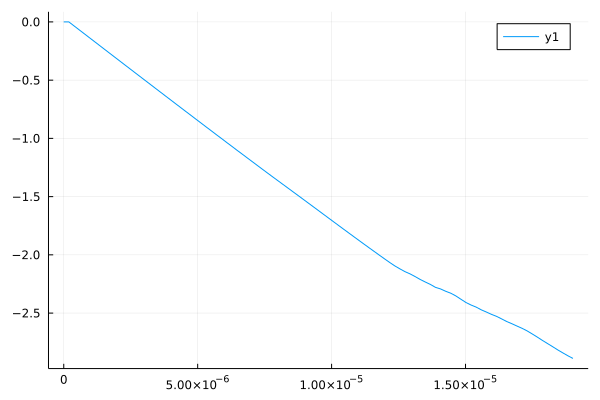

In [37]:
plot(Displacement,Load)

In [38]:
using DelimitedFiles
Disp = writedlm( "DispDataThermoElasticFracture+50.csv",  Displacement, ',')
Force = writedlm("LoadDataThermoElasticFracture+50.csv",  Load, ',')